In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import torch

In [1]:
π = torch.pi

NameError: name 'torch' is not defined

Visualizing Data

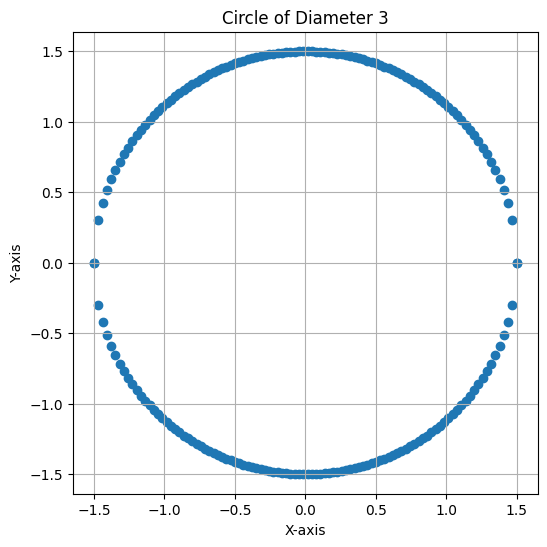

In [3]:
t = torch.linspace(0,1,100)
circle = torch.stack((torch.cos(π*t),torch.sin(π*t)) , dim=1)
plt.plot(circle[0],circle[1])
plt.show()